# Detect relevant sentences

The goal of this notebook is to come up with a fast approach to detect relevant sentences. Relevant sentences are discussed in the notebook about extracting relevant sentences.

In [145]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

from dataset.loader import RelevantSentencesLoader
from util.text import word_to_hash
import nltk
import chainer
import chainer.functions as F
import chainer.links as L

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
# Configuration, adjust to your needs
train_folder = "C:\\Users\\kevjac\\Desktop\\thesis_data\\esd\\0_raw_text\\eval"

First, the data needs to be loaded. Therefore, a JSON loader is created in the next cell which traverses and checks JSON files. For every file, one salient sentence and one non-salient sentence is selected. If no salient sentence is found, the first sentence is picked as salient sentence. In that way, the dataset remains balanced and every JSON file has at least one salient sentence and one non-salient sentence.

In [160]:
vocab_size = 10000
sentence_to_features = lambda sentence: [word_to_hash(word, vocab_size) for word in nltk.word_tokenize(sentence)]
loader = RelevantSentencesLoader(train_folder, nltk.sent_tokenize, sentence_to_features, balance=True, max_files=5000)


1815791.json:   1%|▋                                                                                                                                               | 26/5000 [00:02<07:33, 10.97it/s]


1815839.json:   1%|█▍                                                                                                                                              | 52/5000 [00:05<08:47,  9.39it/s]


1815922.json:   2%|██▏                                                                                                                                             | 78/5000 [00:08<08:37,  9.51it/s]


1815986.json:   2%|███                                                                                                                                            | 107/5000 [00:10<08:19,  9.80it/s]


1816080.json:   3%|███▊                                                                                                                                           | 134/5000 [00:13<08:05, 10.03it/s]


1816129.json:   3%|████▋                                                                                                                                          | 162/5000 [00:15<07:44, 10.42it/s]


1816250.json:   4%|█████▍                                                                                                                                         | 190/5000 [00:18<07:51, 10.20it/s]


1816286.json:   4%|██████▏                                                                                                                                        | 218/5000 [00:20<07:32, 10.58it/s]


1816344.json:   5%|███████                                                                                                                                        | 246/5000 [00:23<07:26, 10.64it/s]


1816482.json:   5%|███████▊                                                                                                                                       | 273/5000 [00:25<07:21, 10.70it/s]


1816539.json:   6%|████████▌                                                                                                                                      | 301/5000 [00:27<07:12, 10.88it/s]


1816648.json:   7%|█████████▍                                                                                                                                     | 328/5000 [00:30<07:12, 10.80it/s]


1816702.json:   7%|██████████▏                                                                                                                                    | 357/5000 [00:32<06:57, 11.11it/s]


1816749.json:   8%|██████████▉                                                                                                                                    | 384/5000 [00:34<06:57, 11.06it/s]


1816902.json:   8%|███████████▋                                                                                                                                   | 410/5000 [00:37<06:54, 11.07it/s]


1816962.json:   9%|████████████▍                                                                                                                                  | 436/5000 [00:40<07:02, 10.80it/s]


1817004.json:   9%|█████████████▎                                                                                                                                 | 464/5000 [00:42<06:53, 10.96it/s]


1817057.json:  10%|██████████████                                                                                                                                 | 493/5000 [00:44<06:43, 11.17it/s]


1817119.json:  10%|██████████████▊                                                                                                                                | 519/5000 [00:46<06:40, 11.20it/s]


1817169.json:  11%|███████████████▋                                                                                                                               | 547/5000 [00:48<06:36, 11.22it/s]


1817222.json:  12%|████████████████▍                                                                                                                              | 575/5000 [00:50<06:32, 11.28it/s]


1817293.json:  12%|█████████████████▏                                                                                                                             | 602/5000 [00:53<06:31, 11.24it/s]


1817379.json:  13%|██████████████████                                                                                                                             | 630/5000 [00:55<06:27, 11.29it/s]


1817429.json:  13%|██████████████████▉                                                                                                                            | 660/5000 [00:58<06:21, 11.37it/s]


1817535.json:  14%|███████████████████▌                                                                                                                           | 686/5000 [01:00<06:19, 11.37it/s]


1817584.json:  14%|████████████████████▍                                                                                                                          | 715/5000 [01:02<06:13, 11.47it/s]


1817644.json:  15%|█████████████████████▏                                                                                                                         | 743/5000 [01:04<06:10, 11.48it/s]


1817773.json:  15%|██████████████████████                                                                                                                         | 770/5000 [01:06<06:07, 11.52it/s]


1817834.json:  16%|██████████████████████▊                                                                                                                        | 798/5000 [01:08<06:03, 11.58it/s]


1817885.json:  17%|███████████████████████▌                                                                                                                       | 826/5000 [01:11<06:00, 11.57it/s]


1818001.json:  17%|████████████████████████▍                                                                                                                      | 854/5000 [01:13<05:59, 11.55it/s]


1818062.json:  18%|█████████████████████████▏                                                                                                                     | 881/5000 [01:15<05:55, 11.60it/s]


1818121.json:  18%|█████████████████████████▉                                                                                                                     | 907/5000 [01:18<05:53, 11.59it/s]


1818228.json:  19%|██████████████████████████▋                                                                                                                    | 935/5000 [01:20<05:51, 11.57it/s]


1818263.json:  19%|███████████████████████████▌                                                                                                                   | 964/5000 [01:22<05:46, 11.63it/s]


1818314.json:  20%|████████████████████████████▍                                                                                                                  | 993/5000 [01:24<05:42, 11.70it/s]


1818406.json:  20%|████████████████████████████▉                                                                                                                 | 1021/5000 [01:27<05:39, 11.72it/s]


1818462.json:  21%|█████████████████████████████▋                                                                                                                | 1047/5000 [01:29<05:36, 11.75it/s]


1818582.json:  21%|██████████████████████████████▌                                                                                                               | 1074/5000 [01:32<05:37, 11.64it/s]


1818659.json:  22%|███████████████████████████████▎                                                                                                              | 1102/5000 [01:35<05:36, 11.60it/s]


1818719.json:  23%|████████████████████████████████                                                                                                              | 1129/5000 [01:37<05:33, 11.60it/s]


1818757.json:  23%|████████████████████████████████▊                                                                                                             | 1156/5000 [01:39<05:30, 11.62it/s]


1818813.json:  24%|█████████████████████████████████▋                                                                                                            | 1184/5000 [01:42<05:29, 11.60it/s]


1818865.json:  24%|██████████████████████████████████▍                                                                                                           | 1211/5000 [01:44<05:27, 11.59it/s]


1818917.json:  25%|███████████████████████████████████▏                                                                                                          | 1238/5000 [01:47<05:26, 11.51it/s]


1818977.json:  25%|███████████████████████████████████▉                                                                                                          | 1264/5000 [01:50<05:25, 11.48it/s]


1819060.json:  26%|████████████████████████████████████▋                                                                                                         | 1290/5000 [01:52<05:23, 11.46it/s]


1819113.json:  26%|█████████████████████████████████████▍                                                                                                        | 1319/5000 [01:54<05:20, 11.48it/s]


1819209.json:  27%|██████████████████████████████████████▏                                                                                                       | 1345/5000 [01:58<05:20, 11.39it/s]


1819264.json:  27%|██████████████████████████████████████▉                                                                                                       | 1371/5000 [02:00<05:18, 11.38it/s]


1819392.json:  28%|███████████████████████████████████████▋                                                                                                      | 1398/5000 [02:03<05:18, 11.31it/s]


1819456.json:  29%|████████████████████████████████████████▍                                                                                                     | 1426/5000 [02:06<05:16, 11.27it/s]


1819572.json:  29%|█████████████████████████████████████████▎                                                                                                    | 1454/5000 [02:08<05:14, 11.29it/s]


1819621.json:  30%|██████████████████████████████████████████                                                                                                    | 1482/5000 [02:11<05:11, 11.31it/s]


1819668.json:  30%|██████████████████████████████████████████▊                                                                                                   | 1509/5000 [02:13<05:08, 11.33it/s]


1819722.json:  31%|███████████████████████████████████████████▌                                                                                                  | 1536/5000 [02:15<05:06, 11.31it/s]


1819828.json:  31%|████████████████████████████████████████████▍                                                                                                 | 1564/5000 [02:18<05:04, 11.29it/s]


1819880.json:  32%|█████████████████████████████████████████████▏                                                                                                | 1591/5000 [02:20<05:01, 11.30it/s]


1819930.json:  32%|█████████████████████████████████████████████▉                                                                                                | 1619/5000 [02:23<05:00, 11.27it/s]


1820006.json:  33%|██████████████████████████████████████████████▊                                                                                               | 1647/5000 [02:25<04:56, 11.29it/s]


1820067.json:  34%|███████████████████████████████████████████████▌                                                                                              | 1675/5000 [02:27<04:53, 11.32it/s]


1820225.json:  34%|████████████████████████████████████████████████▎                                                                                             | 1700/5000 [02:30<04:51, 11.32it/s]


1820284.json:  35%|█████████████████████████████████████████████████                                                                                             | 1728/5000 [02:32<04:49, 11.31it/s]


1820325.json:  35%|█████████████████████████████████████████████████▉                                                                                            | 1758/5000 [02:35<04:46, 11.32it/s]


1820362.json:  36%|██████████████████████████████████████████████████▋                                                                                           | 1784/5000 [02:37<04:44, 11.31it/s]


1820416.json:  36%|███████████████████████████████████████████████████▍                                                                                          | 1812/5000 [02:40<04:42, 11.30it/s]


1820465.json:  37%|████████████████████████████████████████████████████▎                                                                                         | 1840/5000 [02:42<04:39, 11.29it/s]


1820524.json:  37%|████████████████████████████████████████████████████▉                                                                                         | 1866/5000 [02:45<04:38, 11.26it/s]


1820584.json:  38%|█████████████████████████████████████████████████████▊                                                                                        | 1893/5000 [02:48<04:36, 11.26it/s]


1820669.json:  38%|██████████████████████████████████████████████████████▌                                                                                       | 1920/5000 [02:50<04:33, 11.25it/s]


1820741.json:  39%|███████████████████████████████████████████████████████▎                                                                                      | 1948/5000 [02:53<04:31, 11.23it/s]


1820835.json:  40%|████████████████████████████████████████████████████████                                                                                      | 1975/5000 [02:55<04:29, 11.23it/s]


1820901.json:  40%|████████████████████████████████████████████████████████▊                                                                                     | 2002/5000 [02:57<04:26, 11.25it/s]


1821018.json:  41%|█████████████████████████████████████████████████████████▋                                                                                    | 2032/5000 [03:00<04:23, 11.25it/s]


1821087.json:  41%|██████████████████████████████████████████████████████████▍                                                                                   | 2058/5000 [03:02<04:21, 11.27it/s]


1821163.json:  42%|███████████████████████████████████████████████████████████▏                                                                                  | 2086/5000 [03:05<04:18, 11.27it/s]


1821241.json:  42%|████████████████████████████████████████████████████████████                                                                                  | 2115/5000 [03:07<04:15, 11.29it/s]


1821285.json:  43%|████████████████████████████████████████████████████████████▊                                                                                 | 2141/5000 [03:09<04:13, 11.29it/s]


1821343.json:  43%|█████████████████████████████████████████████████████████████▌                                                                                | 2169/5000 [03:11<04:10, 11.30it/s]


1821463.json:  44%|██████████████████████████████████████████████████████████████▍                                                                               | 2197/5000 [03:14<04:08, 11.30it/s]


1821539.json:  44%|███████████████████████████████████████████████████████████████▏                                                                              | 2224/5000 [03:16<04:05, 11.31it/s]


1821603.json:  45%|███████████████████████████████████████████████████████████████▉                                                                              | 2252/5000 [03:19<04:03, 11.29it/s]


1821737.json:  46%|████████████████████████████████████████████████████████████████▊                                                                             | 2280/5000 [03:21<03:59, 11.33it/s]


1821797.json:  46%|█████████████████████████████████████████████████████████████████▌                                                                            | 2308/5000 [03:23<03:57, 11.33it/s]


1821931.json:  47%|██████████████████████████████████████████████████████████████████▎                                                                           | 2336/5000 [03:25<03:54, 11.34it/s]


1821986.json:  47%|███████████████████████████████████████████████████████████████████                                                                           | 2362/5000 [03:28<03:52, 11.35it/s]


1822055.json:  48%|███████████████████████████████████████████████████████████████████▉                                                                          | 2390/5000 [03:30<03:49, 11.35it/s]


1822133.json:  48%|████████████████████████████████████████████████████████████████████▋                                                                         | 2417/5000 [03:33<03:47, 11.34it/s]


1822174.json:  49%|█████████████████████████████████████████████████████████████████████▍                                                                        | 2444/5000 [03:36<03:46, 11.30it/s]


1822257.json:  49%|██████████████████████████████████████████████████████████████████████▏                                                                       | 2471/5000 [03:38<03:43, 11.31it/s]


1822338.json:  50%|██████████████████████████████████████████████████████████████████████▉                                                                       | 2497/5000 [03:41<03:42, 11.26it/s]


1822393.json:  50%|███████████████████████████████████████████████████████████████████████▋                                                                      | 2524/5000 [03:44<03:39, 11.26it/s]


1822505.json:  51%|████████████████████████████████████████████████████████████████████████▍                                                                     | 2552/5000 [03:47<03:37, 11.23it/s]


1822542.json:  52%|█████████████████████████████████████████████████████████████████████████▏                                                                    | 2578/5000 [03:49<03:35, 11.22it/s]


1822601.json:  52%|█████████████████████████████████████████████████████████████████████████▉                                                                    | 2605/5000 [03:51<03:33, 11.23it/s]


1822674.json:  53%|██████████████████████████████████████████████████████████████████████████▊                                                                   | 2633/5000 [03:54<03:30, 11.22it/s]


1822756.json:  53%|███████████████████████████████████████████████████████████████████████████▌                                                                  | 2660/5000 [03:57<03:28, 11.22it/s]


1822811.json:  54%|████████████████████████████████████████████████████████████████████████████▎                                                                 | 2688/5000 [03:59<03:25, 11.23it/s]


1822904.json:  54%|█████████████████████████████████████████████████████████████████████████████▏                                                                | 2716/5000 [04:02<03:23, 11.20it/s]


1822972.json:  55%|█████████████████████████████████████████████████████████████████████████████▉                                                                | 2743/5000 [04:04<03:21, 11.20it/s]


1823044.json:  55%|██████████████████████████████████████████████████████████████████████████████▋                                                               | 2771/5000 [04:07<03:18, 11.20it/s]


1823177.json:  56%|███████████████████████████████████████████████████████████████████████████████▍                                                              | 2798/5000 [04:09<03:16, 11.21it/s]


1823243.json:  56%|████████████████████████████████████████████████████████████████████████████████▏                                                             | 2825/5000 [04:11<03:13, 11.21it/s]


1823286.json:  57%|█████████████████████████████████████████████████████████████████████████████████                                                             | 2853/5000 [04:14<03:11, 11.20it/s]


1823379.json:  58%|█████████████████████████████████████████████████████████████████████████████████▊                                                            | 2879/5000 [04:16<03:09, 11.22it/s]


1823430.json:  58%|██████████████████████████████████████████████████████████████████████████████████▌                                                           | 2907/5000 [04:19<03:06, 11.21it/s]


1823604.json:  59%|███████████████████████████████████████████████████████████████████████████████████▎                                                          | 2933/5000 [04:21<03:04, 11.20it/s]


1823654.json:  59%|████████████████████████████████████████████████████████████████████████████████████                                                          | 2960/5000 [04:24<03:02, 11.18it/s]


1823698.json:  60%|████████████████████████████████████████████████████████████████████████████████████▊                                                         | 2987/5000 [04:27<02:59, 11.18it/s]


1823768.json:  60%|█████████████████████████████████████████████████████████████████████████████████████▋                                                        | 3016/5000 [04:29<02:57, 11.20it/s]


1823822.json:  61%|██████████████████████████████████████████████████████████████████████████████████████▍                                                       | 3043/5000 [04:31<02:54, 11.19it/s]


1823879.json:  61%|███████████████████████████████████████████████████████████████████████████████████████▏                                                      | 3070/5000 [04:34<02:52, 11.19it/s]


1823934.json:  62%|███████████████████████████████████████████████████████████████████████████████████████▉                                                      | 3097/5000 [04:37<02:50, 11.17it/s]


1824043.json:  62%|████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 3124/5000 [04:39<02:47, 11.18it/s]


1824136.json:  63%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 3151/5000 [04:42<02:45, 11.15it/s]


1824198.json:  64%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 3177/5000 [04:45<02:43, 11.13it/s]


1824287.json:  64%|███████████████████████████████████████████████████████████████████████████████████████████                                                   | 3206/5000 [04:47<02:41, 11.14it/s]


1824407.json:  65%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 3233/5000 [04:50<02:38, 11.15it/s]


1824457.json:  65%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 3260/5000 [04:52<02:36, 11.14it/s]


1824585.json:  66%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 3286/5000 [04:55<02:34, 11.12it/s]


1824665.json:  66%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 3315/5000 [04:57<02:31, 11.14it/s]


1824713.json:  67%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 3342/5000 [05:00<02:29, 11.12it/s]


1824892.json:  67%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 3368/5000 [05:02<02:26, 11.12it/s]


1824950.json:  68%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 3396/5000 [05:05<02:24, 11.11it/s]


1825061.json:  68%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 3423/5000 [05:08<02:21, 11.11it/s]


1825119.json:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████                                            | 3451/5000 [05:10<02:19, 11.13it/s]


1825297.json:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 3477/5000 [05:13<02:17, 11.10it/s]


1825364.json:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 3502/5000 [05:15<02:14, 11.10it/s]


1825412.json:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 3530/5000 [05:17<02:12, 11.11it/s]


1825464.json:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 3556/5000 [05:20<02:10, 11.10it/s]


1825519.json:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 3582/5000 [05:22<02:07, 11.09it/s]


1825578.json:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 3609/5000 [05:25<02:05, 11.07it/s]


1825631.json:  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 3636/5000 [05:28<02:03, 11.06it/s]


1825727.json:  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 3661/5000 [05:31<02:01, 11.03it/s]


1825772.json:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 3686/5000 [05:35<01:59, 10.99it/s]


1825875.json:  74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 3711/5000 [05:37<01:57, 10.99it/s]


1825926.json:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 3739/5000 [05:39<01:54, 11.00it/s]


1826015.json:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 3765/5000 [05:43<01:52, 10.97it/s]


1826122.json:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 3795/5000 [05:45<01:49, 10.99it/s]


1826187.json:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 3822/5000 [05:47<01:47, 11.00it/s]


1826321.json:  77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 3850/5000 [05:50<01:44, 10.99it/s]


1826362.json:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 3879/5000 [05:52<01:41, 11.01it/s]


1826512.json:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 3906/5000 [05:55<01:39, 11.00it/s]


1826601.json:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 3935/5000 [05:57<01:36, 11.01it/s]


1826737.json:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 3964/5000 [05:59<01:33, 11.02it/s]


1826940.json:  80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 3992/5000 [06:01<01:31, 11.03it/s]


1827012.json:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 4019/5000 [06:04<01:29, 11.02it/s]


1827047.json:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 4042/5000 [06:08<01:27, 10.98it/s]


1827084.json:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 4067/5000 [06:11<01:25, 10.95it/s]


1827202.json:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 4094/5000 [06:14<01:22, 10.95it/s]


1827425.json:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 4121/5000 [06:16<01:20, 10.94it/s]


1827620.json:  83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 4149/5000 [06:19<01:17, 10.92it/s]


1827802.json:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 4176/5000 [06:22<01:15, 10.92it/s]


1827943.json:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 4201/5000 [06:26<01:13, 10.86it/s]


1828028.json:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 4227/5000 [06:29<01:11, 10.85it/s]


1828221.json:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 4255/5000 [06:32<01:08, 10.84it/s]


1828382.json:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 4281/5000 [06:35<01:06, 10.82it/s]


1828580.json:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 4307/5000 [06:38<01:04, 10.82it/s]


1828703.json:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 4334/5000 [06:40<01:01, 10.82it/s]


1828752.json:  87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 4363/5000 [06:42<00:58, 10.84it/s]


1828815.json:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 4391/5000 [06:45<00:56, 10.84it/s]


1828913.json:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 4418/5000 [06:47<00:53, 10.83it/s]


1829072.json:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 4445/5000 [06:50<00:51, 10.84it/s]


1829240.json:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 4470/5000 [06:53<00:49, 10.81it/s]


1829328.json:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 4498/5000 [06:55<00:46, 10.81it/s]


1829512.json:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 4524/5000 [06:58<00:44, 10.81it/s]


1829720.json:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 4549/5000 [07:01<00:41, 10.79it/s]


1829885.json:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 4572/5000 [07:04<00:39, 10.76it/s]


1830051.json:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 4597/5000 [07:07<00:37, 10.75it/s]


1830116.json:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 4626/5000 [07:10<00:34, 10.75it/s]


1830338.json:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 4652/5000 [07:12<00:32, 10.75it/s]


1830385.json:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 4679/5000 [07:15<00:29, 10.74it/s]


1830422.json:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 4706/5000 [07:18<00:27, 10.74it/s]


1830485.json:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 4732/5000 [07:21<00:24, 10.73it/s]


1830541.json:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 4759/5000 [07:23<00:22, 10.72it/s]


1830763.json:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 4786/5000 [07:26<00:19, 10.72it/s]


1830937.json:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 4811/5000 [07:29<00:17, 10.70it/s]


1831112.json:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 4837/5000 [07:32<00:15, 10.68it/s]


1831197.json:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 4865/5000 [07:35<00:12, 10.68it/s]


1831349.json:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 4892/5000 [07:38<00:10, 10.68it/s]


1831440.json:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 4918/5000 [07:40<00:07, 10.67it/s]


1831589.json:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 4944/5000 [07:43<00:05, 10.66it/s]


1831659.json:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 4968/5000 [07:46<00:03, 10.64it/s]


1831790.json: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 4995/5000 [07:49<00:00, 10.63it/s]


1831798.json: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [07:50<00:00, 10.63it/s]

Now a simple bi-directional LSTM model with a classifier on the final states is creates.

In [174]:
class RSD(chainer.Chain):
    
    def __init__(self, in_size, word_size, hidden_size, *args, **kwargs):
        super().__init__(*args, **kwargs)
        with self.init_scope():
            self.embed = L.EmbedID(in_size, word_size)
            self.rnn = L.NStepBiLSTM(1, word_size, hidden_size, 0.5)
            self.l_out = L.Linear(2)
            
    def __call__(self, xs, ts):
        out = self._predict(xs)
        out_softmax = F.softmax(out)
        loss = F.softmax_cross_entropy(out, ts)
        
        precision = F.precision(out_softmax, ts, 2)[0]
        recall = F.recall(out_softmax, ts, 2)[0]
        f1 = F.f1_score(out_softmax, ts, 2)[0]

        chainer.report({'precision': precision[0]}, self)
        chainer.report({'recall': recall[0]}, self)
        chainer.report({'f1': f1[0]}, self)
        chainer.report({'loss': loss.data}, self)
        return loss
    
    def _predict(self, xs):
        xs_lens = [len(seq) for seq in xs]
        xs_lens_sum = self.xp.cumsum(xs_lens)
        xs_flat = self.xp.asarray([x for seq in xs for x in seq], dtype='i')
        exs_flat = self.embed(xs_flat)
        exs = F.split_axis(exs_flat, xs_lens_sum[:-1], 0)
        hx, cs, ys = self.rnn(None, None, exs)
        final = F.concat([F.expand_dims(y[-1], 0) for y in ys], axis=0)
        out = self.l_out(final)
        return out
    
    def predict(self, xs):
        return F.softmax(self._predict(xs))

model = RSD(vocab_size, 128, 128)

Now it is possible to create a training procedure for the method.

In [179]:
from chainer.iterators import SerialIterator
from chainer import training
from chainer.training import extensions

def converter(minibatch, device=None):
    return {
        'xs': [item['features'] for item in minibatch],
        #'pos': [item['position'] for item in minibatch],
        'ts': np.asarray([int(item['is_relevant']) for item in minibatch], dtype='i')
    }

train_iter = SerialIterator(loader, batch_size=20, shuffle=True, repeat=False)

optimizer = chainer.optimizers.AdaDelta()
optimizer.setup(model)

updater = training.StandardUpdater(train_iter, optimizer, converter=converter)
trainer = training.Trainer(updater, (10000, 'iteration'), out='out')

trainer.extend(extensions.LogReport(trigger=(1, 'iteration')))
trainer.extend(extensions.PlotReport(['main/loss'], file_name='loss.png', trigger=(10, 'iteration')))
trainer.extend(extensions.PlotReport(['main/f1'], file_name='f1.png', trigger=(10, 'iteration')))
trainer.extend(extensions.PlotReport(y_keys=['main/recall'], file_name='recall.png', trigger=(10, 'iteration')))
trainer.extend(extensions.PlotReport(y_keys=['main/precision'], file_name='precision.png', trigger=(10, 'iteration')))
trainer.extend(extensions.PrintReport(['epoch', 'iteration', 'main/loss', 'main/f1', 'main/precision', 'main/recall']))
trainer.extend(extensions.snapshot_object(model, 'model.npz'), trigger=(10, 'iteration'))

trainer.run()


C:\Users\kevjac\Anaconda3\lib\site-packages\chainer\functions\evaluation\classification_summary.py:14: RuntimeWarning: invalid value encountered in true_divide
  (beta_square * precision + recall)).astype(precision.dtype)
C:\Users\kevjac\Anaconda3\lib\site-packages\chainer\functions\evaluation\classification_summary.py:63: RuntimeWarning: invalid value encountered in true_divide
  precision = tp / relevant


epoch       iteration   main/loss   main/f1     main/precision  main/recall
0           1           0.640942    0.709677    0.578947        0.916667     
0           2           0.76966     0.461538    0.3             1            
0           3           0.680838    0.222222    0.333333        0.166667     
0           4           0.693667    0.181818    1               0.1          
0           5           0.709972    0.352941    1               0.214286     
0           6           0.661354    0.709677    0.55            1            
0           7           0.681231    0.714286    0.555556        1            
0           8           0.675337    0.5         0.571429        0.444444     
0           9           0.630846    0.6         0.6             0.6          
0           10          0.764389    0.153846    0.5             0.0909091    
0           11          0.68472     0.333333    0.4             0.285714     
0           12          0.661619    nan         nan             0 

0           106         0.711125    0.444444    0.5             0.4          
0           107         0.710464    0.631579    0.666667        0.6          
0           108         0.661937    0.428571    0.6             0.333333     
0           109         0.611185    0.736842    1               0.583333     
0           110         0.672808    0.692308    0.692308        0.692308     
0           111         0.735601    0.5         0.454545        0.555556     
0           112         0.646638    0.588235    0.555556        0.625        
0           113         0.626757    0.740741    1               0.588235     
0           114         0.605203    0.787879    0.65            1            
0           115         0.648904    0.689655    0.625           0.769231     
0           116         0.77724     0.62069     0.529412        0.75         
0           117         0.628092    0.714286    0.588235        0.909091     
0           118         0.780945    0.454545    0.3125          

0           212         0.724783    0.285714    0.333333        0.25         
0           213         0.821422    0.444444    0.571429        0.363636     
0           214         0.712656    0.5         0.625           0.416667     
0           215         0.576869    0.75        0.75            0.75         
0           216         0.627158    0.636364    0.636364        0.636364     
0           217         0.612834    0.533333    0.666667        0.444444     
0           218         0.599478    0.7         1               0.538462     
0           219         0.565193    0.769231    0.714286        0.833333     
0           220         0.667239    0.6         0.6             0.6          
0           221         0.580901    0.782609    0.642857        1            
0           222         0.650503    0.692308    0.818182        0.6          
0           223         0.570666    0.8         0.769231        0.833333     
0           224         0.595634    0.7         0.636364        

0           318         0.733779    0.4         0.6             0.3          
0           319         0.548698    0.842105    1               0.727273     
0           320         0.636033    0.636364    0.636364        0.636364     
0           321         0.610263    0.64        0.571429        0.727273     
0           322         0.560506    0.75        0.857143        0.666667     
0           323         0.665283    0.6         0.6             0.6          
0           324         0.658465    0.5         0.8             0.363636     
0           325         0.652891    0.444444    0.333333        0.666667     
0           326         0.778424    0.4         0.666667        0.285714     
0           327         0.62086     0.777778    0.7             0.875        
0           328         0.65495     0.444444    0.4             0.5          
0           329         0.56174     0.75        1               0.6          
0           330         0.588666    0.571429    1               

0           424         0.667046    0.470588    0.5             0.444444     
0           425         0.585741    0.625       0.625           0.625        
0           426         0.658107    0.533333    0.5             0.571429     
0           427         0.583598    0.75        0.9             0.642857     
0           428         0.617615    0.736842    0.7             0.777778     
0           429         0.657366    0.636364    0.636364        0.636364     
0           430         0.589846    0.7         0.636364        0.777778     
0           431         0.58303     0.666667    1               0.5          
0           432         0.6087      0.7         0.875           0.583333     
0           433         0.72279     0.526316    0.625           0.454545     
0           434         0.524903    0.818182    0.75            0.9          
0           435         0.649336    0.5         0.571429        0.444444     
0           436         0.631217    0.555556    0.833333        

Exception in main training loop: 
Traceback (most recent call last):
  File "C:\Users\kevjac\Anaconda3\lib\site-packages\chainer\training\trainer.py", line 299, in run
    update()
  File "C:\Users\kevjac\Anaconda3\lib\site-packages\chainer\training\updater.py", line 223, in update
    self.update_core()
  File "C:\Users\kevjac\Anaconda3\lib\site-packages\chainer\training\updater.py", line 227, in update_core
    batch = self._iterators['main'].next()
  File "C:\Users\kevjac\Anaconda3\lib\site-packages\chainer\iterators\serial_iterator.py", line 46, in __next__
    raise StopIteration
Will finalize trainer extensions and updater before reraising the exception.


1           518         0.626553    0.571429    0.666667        0.5          


StopIteration: 

It can be seen that the model is capable of detecting relevant sentences:

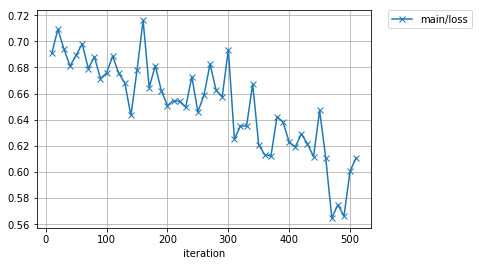

In [196]:
from IPython.display import Image
Image(filename='out/loss.png')

Now, let's try out the trained model.

In [193]:
from IPython.core.display import display, HTML

abstract = """Architects privately note difficulties resulting from power of public opinion in choosing design for World Trade Center site; note unheard-of live TV broadcast presenting six initial site plans, which resulted in rejection of all designs; interviews reveal variety of opinions among architects on unusual selection process; photo (M)"""
text = """While architects have publicly proclaimed the World Trade Center site proposals displayed at the Winter Garden in Lower Manhattan as the greatest architecture show ever, many have privately expressed reservations about the designs' details, the handling of the competition and even the spotlight in which the contestants now stand.\n\n        ''Architecture is finally having a visible presence, perhaps too visible,'' said Ricardo Scofidio of Diller & Scofidio in Manhattan.\n\n      \n\n      \n\n        Many architects fear that the attention and intensity given to the World Trade Center designs will greatly affect the project.\n\n      \n\n      \n\n        While architects have publicly proclaimed the World Trade Center site proposals displayed at the Winter Garden in Lower Manhattan as the greatest architecture show ever, many have privately expressed reservations about the designs' details, the handling of the competition and even the spotlight in which the contestants now stand.\n\n        ''Architecture is finally having a visible presence, perhaps too visible,'' said Ricardo Scofidio of Diller & Scofidio in Manhattan.\n\n        The popular image of the architect as a creative genius whipping up great designs on a cocktail napkin is at odds with the reality. More often, architects say, great design is the result of constant, sometimes painful give-and-take between the architect and the client. Letting the public in on the process from the start, even as spectators, has pulled back the veil on a ritual that is most often conducted in the hush of boardrooms and private offices.\n\n        By contrast, the Lower Manhattan Development Corporation announced that its design priorities for the site would be determined ''by conducting the most comprehensive public outreach campaign ever undertaken.'' The power of public opinion to sway the process was amply demonstrated in July when six initial site plans were universally rejected. In this, the second round, the public has been treated to front-row seats: the presentations by the seven competing architectural teams were televised live for more than three hours, and an exhibition of their models, renderings and video walk-throughs was open to the public almost immediately. Several architectural institutions have stepped in quickly to arrange their own forums, discussion groups and exhibitions on the process, and television networks have devoted unusual amounts of air time to explaining site plans and computer-animated design.\n\n        Architects ''presenting on TV has never happened before,'' Mr. Scofidio added. ''But at this phase, letting the public say what it likes and doesn't like will only make the water muddier,'' he said, explaining that what may be a great spectacle was no way to select a design.\n\n        Bill Lacy, a design consultant and adviser to the jury on architecture's highest honor, the Pritzker Prize, said that the Lower Manhattan redevelopment was ''far too important to be judged by public opinion poll.''\n\n        ''I feel sorry for these architects designing in a fish bowl,'' he continued. ''The first team did a credible job but was crucified by being exposed to the public prematurely. People are so eager for something positive to happen, but land use and massing studies are never exciting. You can't design for seven million clients.''\n\n        Mindful of the effort involved in preparing such complex and historically significant designs in just eight weeks (and with fees of only $40,000), the 16 architects interviewed for this article were loath to single out any team's design. But they did not hesitate to criticize the process as too exposed and the requirements as too vague.\n\n        The attention and its intensity are mixed blessings, said some architects, who worried that some of the more implausible designs might be taken literally, leaving the entire profession open to ridicule and condemnation. ''There is something a little grotesque in the interpretation of ground zero as a lucky break for art,'' Leon Wieseltier, literary editor of The New Republic, said last September in a debate with Daniel Libeskind, one of the competing architects, at Columbia University.\n\n        The development corporation has frequently said that the object of the competition, a master land-use plan, is not to ''include the detailed architecture of individual structures.'' But many architects worry that the teams' detailed models and impressively realistic video presentations will encourage the public to perceive them as concrete plans.\n\n        Bernard Tschumi, a semifinalist in the competition and the dean of the Columbia Graduate School of Architecture, Planning and Preservation, described the process as backward. ''They are starting with a design and hope to arrive at a program,'' he said. ''It strikes me as unusual. And since each design is based on its own premises, you really can't compare them to each other at all. The ambiguity is not right.''\n\n        While some architects championed the competition as a way to educate the public about the importance of architecture, many faulted the proposals for the way the buildings met the ground and integrated with the city.\n\n        ''There should be more talk about activities, not buildings,'' said the architect Denise Scott Brown of Venturi, Scott Brown & Associates in Philadelphia. ''A great deal of money will be spent quickly on the transit system, and that will affect what else happens. All those people coming up out of the subway will surely affect the design.'' She said she wasn't sure that factor was reflected in the proposals, ''while, in fact, it should be the generator of these designs.''\n\n        Other architects said too much creative vision was expended on towers and not enough on street-level elements.\n\n        ''The ground plan and infrastructure are surprisingly conservative in contrast to the boldness of the architecture,'' said Ralph Lerner, a Princeton, N.J., architect and former dean of the Princeton University School of Architecture, who is now working on the design of several areas adjacent to the World Trade Center site. ''There weren't many new thoughts on how to treat ground transportation.''\n\n        Many architects, however, commended the building proposals for incorporating the latest innovations in energy efficiency. ''This will be the first time that European daring in ecological issues has been introduced at such a scale in the U.S.,'' said Raymond W. Gastil, executive director of the Van Alen Institute, a nonprofit organization devoted to increasing awareness of public architecture, ''but it will create new standards for all skyscrapers.''\n\n        The Van Alen Institute recently published a report, ''Information Exchange: How Cities Renew, Rebuild and Remember,'' exploring how seven cities, including Beirut, Sarajevo and Berlin, rebuilt themselves in the wake of both natural and political disasters.\n\n        As for building height, architects' opinions varied about what was appropriate for structures that would stand not in, but next to, the footsteps of the lanky twin towers.\n\n        ''I'm offended by everyone reaching to the sky again,'' said Will Bruder, an architect in Phoenix who focuses on environmental and recycling issues. Of the tall designs, he found Mr. Libeskind's 1,776-foot tapering tower the most convincing. ''At least he reached up to the sky with sculpture instead of a bulky mass,'' Mr. Bruder said.\n\n        Did any of the competitors succeed at reinventing the skyscraper for a new era? Only if you've never seen Hong Kong, Mr. Lerner said. United Architects' tall, angled structures, which combined into a single public floor high in the sky, were the only proposals suggesting a new way of thinking about large buildings in groups, he added.\n\n        Hugh Hardy of Hardy Holzmann Pfeiffer in Manhattan, who did not participate in the competition, said he was not convinced that a new kind of skyscraper was possible at this time. The circumstances that created landmarks like the Chrysler and Empire State buildings were different, he said. ''Not in our lifetime has anyone been able to figure out what New York should be,'' Mr. Hardy explained. ''We're all out of practice, and there's no powerful leadership. Without someone in charge, it's all going to have to be worked out each step of the way.''\n\n        All the architects wondered how the development corporation would proceed. The interested public, already well informed on the issues, has still more opportunities to learn. On Monday the Architectural League will open an exhibition that is like a continuing public tutorial. It will display a range of documents connected to the design proposals, from the architects' video presentations to the reactions of the European news media.\n\n        The exhibition is intended to be ''an archive of the process,'' said Rosalie Genevro, the league's executive director, and it will be updated as more materials become available. ''The first round was so bland, there was nothing to talk about,'' she said. ''Now there's so much more to look at and to sort out. And there's more emotion.'' The exhibition will run through the end of February, when, the development corporation announced, it will adopt a final master land-use plan and undertake a competition for a ground zero memorial.\n\n        On Tuesday Architectural Record magazine is sponsoring a forum of architects and architectural critics, including Mr. Tschumi and Richard Kahan, the former chief executive of the Battery Park City Authority, who oversaw the creation of the master plan for Battery Park City in the 1980's. All the architects in the competition have been invited, along with representatives of the development corporation and Port Authority.\n\n        ''It's an intellectual exercise,'' said Robert Ivy, the editor in chief of Architectural Record. ''Have there ever been so many wonderful ideas to discuss, such depth of feeling to explore? My great fear is that they are trying to make a camel with three humps.''\n\n        But fears and criticism pale beside the excitement that most architects said they felt at the opportunity to see so much world-class architecture on display. ''This is a fantastic show of talent,'' said Cesar Pelli, the architect of the World Financial Center and the Winter Garden, who estimated that the architects involved must have spent as much as $4 million on their combined presentations.\n\n        ''The community is getting a huge gift from these architects,'' Mr. Pelli said, adding, ''Of course, the architects are also getting phenomenal P.R.''""".replace('\n', ' ')
sentences = nltk.sent_tokenize(text)
features = [sentence_to_features(sentence) for sentence in sentences]
scores = model.predict(features).data
score_values = scores[:, 1]
is_relevant = np.argmax(scores, axis=1)
print('Abstract:')
print('-' * 120)
print(abstract)
print()
print('Relevant (1 for relevant, 0 for non-relevant), score (0.0 for non-relevant, 1.0 for relevant) and sentence')
print('-' * 120)
for r, p, sentence in zip(is_relevant, score_values, sentences):
    display(HTML('<span style="color: %s;">%d %.2f %s</span>' % ('green' if r else 'red', r, p, sentence)))

Abstract:
------------------------------------------------------------------------------------------------------------------------
Architects privately note difficulties resulting from power of public opinion in choosing design for World Trade Center site; note unheard-of live TV broadcast presenting six initial site plans, which resulted in rejection of all designs; interviews reveal variety of opinions among architects on unusual selection process; photo (M)

Relevant (1 for relevant, 0 for non-relevant), score (0.0 for non-relevant, 1.0 for relevant) and sentence
------------------------------------------------------------------------------------------------------------------------


In [195]:
from IPython.core.display import display, HTML

text = """The domestic dog (Canis lupus familiaris or Canis familiaris) is a member of the genus Canis (canines), which forms part of the wolf-like canids, and is the most widely abundant terrestrial carnivore. The dog and the extant gray wolf are sister taxa as modern wolves are not closely related to the wolves that were first domesticated, which implies that the direct ancestor of the dog is extinct. The dog was the first species to be domesticated and has been selectively bred over millennia for various behaviors, sensory capabilities, and physical attributes. Their long association with humans has led dogs to be uniquely attuned to human behavior and they are able to thrive on a starch-rich diet that would be inadequate for other canid species. New research seems to show that dogs have mutations to equivalent genetic regions in humans where changes are known to trigger high sociability and somewhat reduced intelligence. Dogs vary widely in shape, size and colors. Dogs perform many roles for people, such as hunting, herding, pulling loads, protection, assisting police and military, companionship and, more recently, aiding handicapped individuals and therapeutic roles. This influence on human society has given them the sobriquet "man's best friend"."""
sentences = nltk.sent_tokenize(text)
features = [sentence_to_features(sentence) for sentence in sentences]
scores = model.predict(features).data
score_values = scores[:, 1]
is_relevant = np.argmax(scores, axis=1)
print('Relevant (1 for relevant, 0 for non-relevant), score (0.0 for non-relevant, 1.0 for relevant) and sentence')
print('-' * 120)
for r, p, sentence in zip(is_relevant, score_values, sentences):
    display(HTML('<span style="color: %s;">%d %.2f %s</span>' % ('green' if r else 'red', r, p, sentence)))

Relevant (1 for relevant, 0 for non-relevant), score (0.0 for non-relevant, 1.0 for relevant) and sentence
------------------------------------------------------------------------------------------------------------------------


## Conclusion

Even a not fully trained model is capable of detecting relevant sentences. This would mean a great speed-up for the overall model. It might be useful to add more sentence independent features as sentence position and binary features for indicating the number of sentences in the document. 